# Question 1: Random walk on a lattice

Consider a lattice on the unit square with N points in each coordinate direction(including  points  on  the  boundary  of  the  square).   We  place  a  particle  on  astarting position;

$\displaystyle (x_i,y_j)$ where
$i= 1,...,N ; j = 1,...,N$

on the lattice and start arandom  walk  from  there.   In  each  step  of  the  random  walk  the  particle  cango with equal probability one step left, right, up, or down on the lattice.  Westop the random walk when one of the boundary points is reached.  For eachinterior lattice point we now want to compute the probability that the particlereaches the bottom edge of the unit square.  

The expected output is a plot ofthe probability function

$\displaystyle p(x_i,y_j)$ over the lattice.  

To estimate the probabilityfor each lattice point you need to run a number of random walk instances fromthat point and record the fraction of random walks that end up at the bottomedge.  Think carefully about how you optimise the code.  Study the convergenceof your code as you increase the number of random walk trials per lattice point,and also as you increase the number N of lattice points.  In your documentationjustify your implementation decisions


# Start problem:

In [38]:
import time

class Timer:    
    def __enter__(self):
        self.start = time.time()
        return self

    def __exit__(self, *args):
        self.end = time.time()
        self.interval = self.end - self.start

I will import the Timer function from class and use it in this notebook to test the speed of various algorythems.

To begin with we can make a matrix of possible movement options and randomly selected a column to act as a movement operator in a direction. Note this has been changed to allow for njit. Originally this was done using numpy arrays, but it was replaced with lists.

The initial position, in this example $x=y=5$ for a matrix of size $10 \times 10$, will have a random colomn added to it to give it a new position. $5$ was chosen to give a good midpoint for a good length walk.

In [39]:
x=5
y=5
N=10

In [40]:
import numpy as np

particlepos= [[x],[y]]                                                                  #created an array for position, for matrix*matrix calculations
movementoption = [[-1,1,0,0],[0,0,-1,1]]                                                 #array of possible movements.
                                                                               #sets an initial boundary counter    

while 0 < particlepos[0][0] < N and 0 < particlepos[1][0] < N:
    rand=np.random.randint(0,4)
    movement = [movementoption[0][rand]],[movementoption[1][rand]]                            #created a seperate movement
    particlepos = [[particlepos[0][0] + movement[0][0]],[particlepos[1][0] + movement[1][0]]]
    if particlepos[1][0] == N:                                                           #picked a boundary that made the coding easier with "k" loop
        continue
    if particlepos[0][0] == N or particlepos[0][0] == 0 or particlepos[1][0] == 0:         #created an endpoint
        continue

This while loop checks the initial postiion of the particlespos array and applies a random movement untill either of its parameters reach a boundry. 
I chose to do it as one loop to make it quicker. The movement is chosen by picking a random coloumn from the movement option array and adding it to the particlepos array. Each coloumn represents a direction for the particle to move.

I have proactively given a seperate boundary condition to one boundary for the latter parts of this question.



To test that this is working as intended, we can define a function to plot a graph of the movement

In [41]:
import numpy as np


def plotofmovement(N):   
    
    plotarray=[]
    plotarray.append(np.array([[x],[y]]))
    particlepos= [[x],[y]]                                                                  #created an array for position, for matrix*matrix calculations
    movementoption = [[-1,1,0,0],[0,0,-1,1]]                                                 #array of possible movements.

    while 0 < particlepos[0][0] < N and 0 < particlepos[1][0] < N:
        rand=np.random.randint(0,4)
        movement = [movementoption[0][rand]],[movementoption[1][rand]]                            #created a seperate movement
        particlepos = [[particlepos[0][0] + movement[0][0]],[particlepos[1][0] + movement[1][0]]]
        plotarray=np.append(plotarray,[particlepos], axis =0)
        if particlepos[1][0] == N:                                                           #picked a boundary that made the coding easier with "k" loop
            continue
        if particlepos[0][0] == N or particlepos[0][0] == 0 or particlepos[1][0] == 0:         #created an endpoint
            continue

    return plotarray  

In [42]:
import matplotlib.pyplot as plt

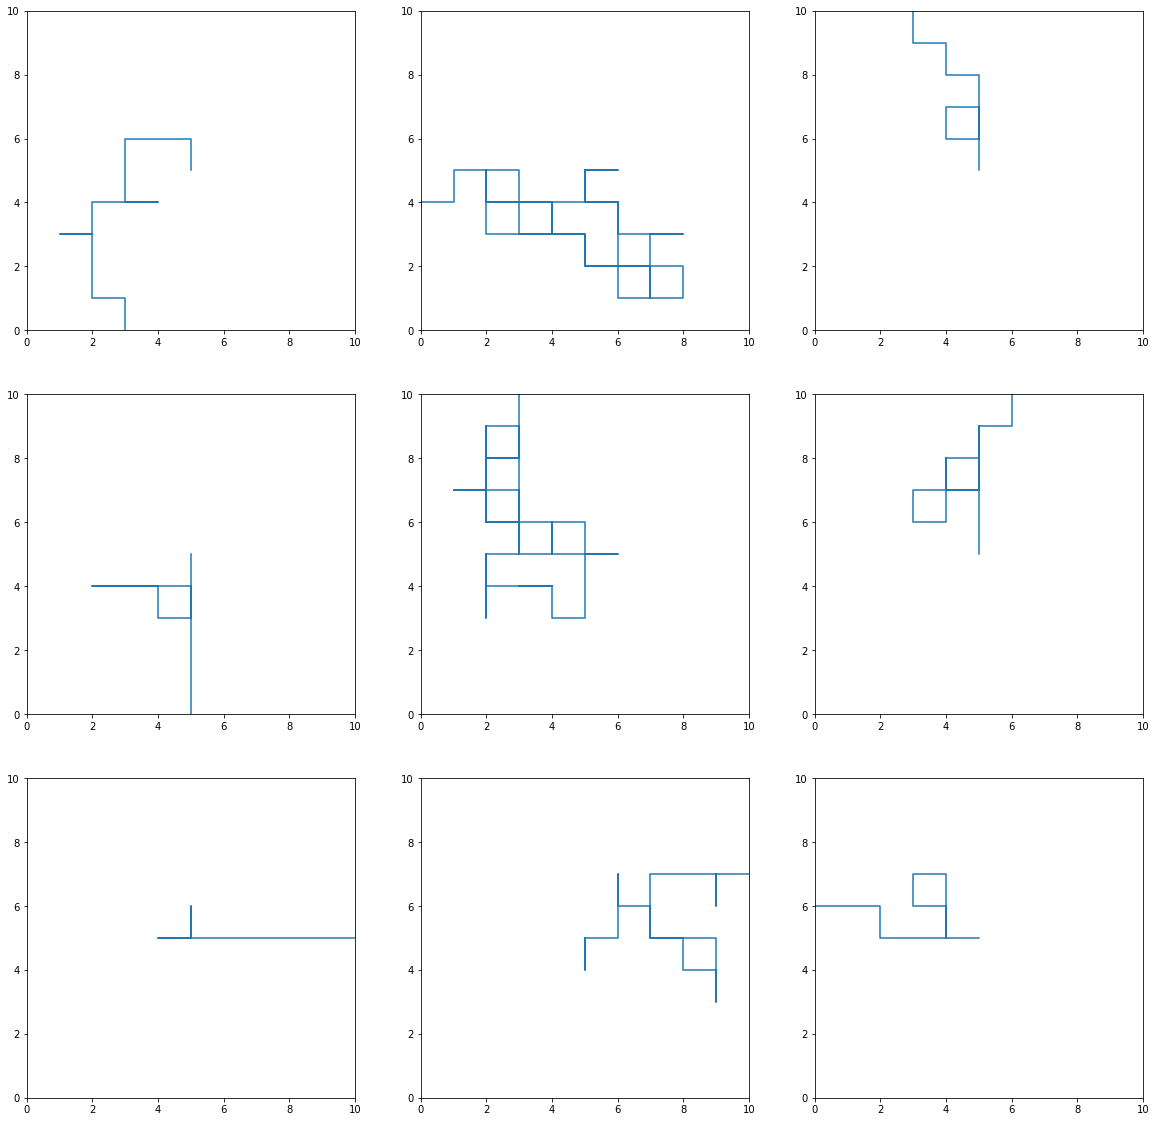

In [53]:
plotarray1=plotofmovement(N)
plotarray2=plotofmovement(N)
plotarray3=plotofmovement(N)
plotarray4=plotofmovement(N)
plotarray5=plotofmovement(N)
plotarray6=plotofmovement(N)
plotarray7=plotofmovement(N)
plotarray8=plotofmovement(N)
plotarray9=plotofmovement(N)

plt.figure(figsize=(20,20))

plt.subplot(331)
plt.plot(plotarray1[:,0],plotarray1[:,1])
plt.axis([0, N,0, N])
plt.subplot(332)
plt.plot(plotarray2[:,0],plotarray2[:,1])
plt.axis([0, N,0, N])
plt.subplot(333)
plt.plot(plotarray3[:,0],plotarray3[:,1])
plt.axis([0, N,0, N])
plt.subplot(334)
plt.plot(plotarray4[:,0],plotarray4[:,1])
plt.axis([0, N,0, N])
plt.subplot(335)
plt.plot(plotarray5[:,0],plotarray5[:,1])
plt.axis([0, N,0, N])
plt.subplot(336)
plt.plot(plotarray6[:,0],plotarray6[:,1])
plt.axis([0, N,0, N])
plt.subplot(337)
plt.plot(plotarray7[:,0],plotarray7[:,1])
plt.axis([0, N,0, N])
plt.subplot(338)
plt.plot(plotarray8[:,0],plotarray8[:,1])
plt.axis([0, N,0, N])
plt.subplot(339)
plt.plot(plotarray9[:,0],plotarray9[:,1])
plt.axis([0, N,0, N])

plt.show()

Here we can see that once it reaches any boundary it will stop the random walk. Hopefully 9 iterations is enough for it to reach every boundary, statistically it should be. 

Now that it stops at each boundary we can tell it to add a counter if it reaches the boundary we're interseted in. The way this algorithm has been coded later means we had to speficy my boundary a little differently. This matrix runs from N to 0 along the y asize and then from 0 back to N along the axis, but it works out the same. 

If we put this in a for loop we can divide the number of times it hit the boundary by the total number of runs to get the probability of reaching the botttom, i.e:

In [54]:
runs=10

In [55]:
bcount = 0

for i in range(runs):                                                                             #made a goddam while loop to run the code for a probability

    particlepos= [[x],[y]]                                                                  #created an array for position, for matrix*matrix calculations
    movementoption = [[-1,1,0,0],[0,0,-1,1]]                                                 #array of possible movements.

    while 0 < particlepos[0][0] < N and 0 < particlepos[1][0] < N:
        rand=np.random.randint(0,4)
        movement = [movementoption[0][rand]],[movementoption[1][rand]]                            #created a seperate movement
        particlepos = [[particlepos[0][0] + movement[0][0]],[particlepos[1][0] + movement[1][0]]]
        if particlepos[1][0] == N:                                                           #picked a boundary that made the coding easier with "k" loop
            bcount += 1                                                                     #add to count of each time selected boundary is hit
            continue
        if particlepos[0][0] == N or particlepos[0][0] == 0 or particlepos[1][0] == 0:         #created an endpoint
            continue

print(bcount/runs)                 # here is the probablity it will reach our target boundary over the for loop

0.1


Again feel free to run this multiple times in order to show that the value changes. As it is in the middle the value should be fairly low, about 0.2 to 0.3 or 20-30%. 

Note that by changing the runs we increase the accuracy of our test. Adding more runs here is the same as running the finished matrix a number of times and dividing by those runs. 

The next step is to get our function to test each point in an $N \times N$ matrix. To do this 2 while loops have been initialised. One that runs across a row of x points and one that moves the y coordinate down after a row has been completed.

In [56]:
#initialise while loop part 1
#start positions in the output matrix

k=0                                                                                             
x=0                                                                                                 
y=0

#initialise matrix for output of prob(make shared array)
probmatrix=np.zeros((N+1,N+1))                                                                      
probmatrix[N][:]= 1

#while loop for y's
while k < N:                                                                                        
    j=0                                                                                             
    
    #while loop for x
    while j < N:                                                                                    
        
        #intialise a count for when the particle reaches the bottom
        bcount=0                                                   
        
        for i in range(runs):                                                                             

            particlepos= [[x],[y]]                                                                  
            movementoption = [[-1,1,0,0],[0,0,-1,1]]                                                 

            while 0 < particlepos[0][0] < N and 0 < particlepos[1][0] < N:
                rand=np.random.randint(0,4)
                movement = [movementoption[0][rand]],[movementoption[1][rand]]                            
                particlepos = [[particlepos[0][0] + movement[0][0]],[particlepos[1][0] + movement[1][0]]]
                if particlepos[1][0] == N:                                                           
                    bcount += 1                                                                     
                    continue
                if particlepos[0][0] == N or particlepos[0][0] == 0 or particlepos[1][0] == 0:         
                    continue

        prob=bcount/runs   
        #ammend each probablity to output matrix
        probmatrix[y][x]=prob  
        #movees test sample along one after "runs" iterations
        x += 1                                                                                      
        j += 1
        #resets x position after N runs, like a typewriter
        if j == N:                                                                                  
            x -= N                                                                                  
            continue        
    #moves down matrix one each iteration    
    k += 1                                                                                         
    y += 1                                                                                          
    if y == N:
        continue 

Note that there is also an artifical line at the bottom that gives 1 as a probablity. This is because the test cannot be run through the boundary lines, as they automatically results in a termination of the while loop. I have also added a boundary around the outisde for this reason.

Lastly the bottom corners were chosen to be valued as a pass for the loop, as they could be argued to be either, having started on both boundaries at once. 

The full code is below, njit and  prange has been added to the code in order to parrellise the proccess. This maxes out my cores and gives me about a 50% increase in execution speed, with a few caveats that are listed below

In [57]:
import numpy as np
from numba import njit,prange


def latticenojit(N,runs):

    k=0                                                                                                 
    x=0                                                                                                 
    y=0

    probmatrix=np.zeros((N+1,N+1))                                                                      
    probmatrix[N][:]= 1


    while k < N:                                                                                        

        j=0                                                                                             

        while j < N:                                                                                    

            bcount=0                                                                                    

            for i in prange(runs):                                                                             

                particlepos= [[x],[y]]                                                                  
                movementoption = [[-1,1,0,0],[0,0,-1,1]]                                                 

                while 0 < particlepos[0][0] < N and 0 < particlepos[1][0] < N:
                    rand=np.random.randint(0,4)
                    movement = [movementoption[0][rand]],[movementoption[1][rand]]                            
                    particlepos = [[particlepos[0][0] + movement[0][0]],[particlepos[1][0] + movement[1][0]]]
                    if particlepos[1][0] == N:                                                           
                        bcount += 1                                                                     
                        continue
                    if particlepos[0][0] == N or particlepos[0][0] == 0 or particlepos[1][0] == 0:         
                        continue

            prob=bcount/runs                                                                            
            probmatrix[y][x]=prob                                                                        
            x += 1                                                                                      
            j += 1                                                                                      
            if j == N:                                                                                  
                x -= N                                                                                  
                continue        

        k += 1                                                                                          
        y += 1                                                                                          
        if y == N:
            continue                                                                                    



    return probmatrix

In [58]:
import numpy as np
from numba import njit,prange


@njit(parallel=True)
def lattice(N,runs):

    k=0                                                                                                 
    x=0                                                                                                 
    y=0

    probmatrix=np.zeros((N+1,N+1))                                                                      
    probmatrix[N][:]= 1


    while k < N:                                                                                        

        j=0                                                                                             

        while j < N:                                                                                    

            bcount=0                                                                                    

            for i in prange(runs):                                                                             

                particlepos= [[x],[y]]                                                                  
                movementoption = [[-1,1,0,0],[0,0,-1,1]]                                                 

                while 0 < particlepos[0][0] < N and 0 < particlepos[1][0] < N:
                    rand=np.random.randint(0,4)
                    movement = [movementoption[0][rand]],[movementoption[1][rand]]                            
                    particlepos = [[particlepos[0][0] + movement[0][0]],[particlepos[1][0] + movement[1][0]]]
                    if particlepos[1][0] == N:                                                           
                        bcount += 1                                                                     
                        continue
                    if particlepos[0][0] == N or particlepos[0][0] == 0 or particlepos[1][0] == 0:         
                        continue

            prob=bcount/runs                                                                            
            probmatrix[y][x]=prob                                                                        
            x += 1                                                                                      
            j += 1                                                                                      
            if j == N:                                                                                  
                x -= N                                                                                  
                continue        

        k += 1                                                                                          
        y += 1                                                                                          
        if y == N:
            continue                                                                                    



    return probmatrix

It is important to note that this is actually a little slower for smaller lattices, but the benefits greatly increase when we increase the size of the lattices or the number of runs at each point. 

Below are a few tests to show roughly where it starts to get faster for number of runs and for lattice size. 

In [59]:
with Timer() as t:
    latticenojit(10,10000)
print(t.interval)

31.632339000701904


In [60]:
with Timer() as t:
    lattice(10,10000)
print(t.interval)

17.538892030715942


For larger lattices $(N>100)$ 10000 runs is completely unreasonable to achieve, as each run might take a few seconds to complete.

In [61]:
with Timer() as t:
    latticenojit(30,100)
print(t.interval)

17.397438526153564


In [62]:
with Timer() as t:
    lattice(30,100)
print(t.interval)

14.362560987472534


Now we get to the final output that we will calculate. As requested in the question this is the $\displaystyle p(x_i,y_j)$ for each point in a grid.

This run takes almost exactly 2 minutes on my system, so it should be fine to run with these parameters. However I will include another one further down that I ran at home with larger datapoints to show a lovely smooth function.

In [63]:
with Timer() as t:
    C = lattice(50,100)
print(t.interval)

111.23928427696228


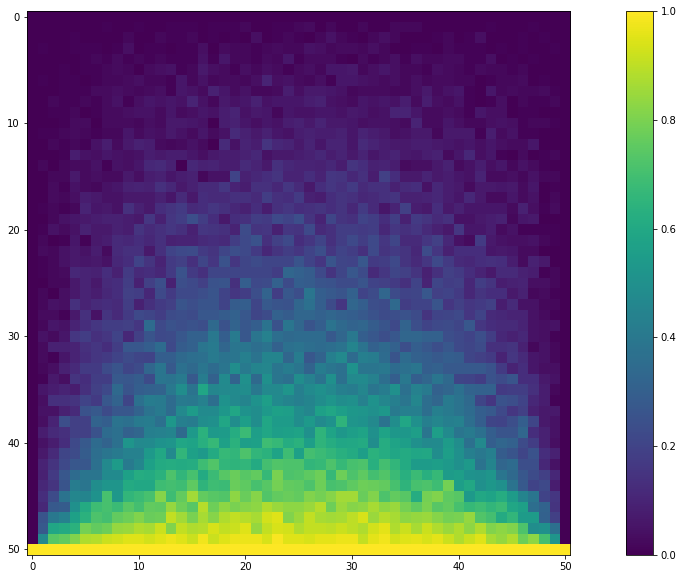

In [65]:
#now wer can plot this, which is increadibly simple as the data is already in a probablity format
plt.figure(figsize=(20,10))
plt.imshow(C)
plt.colorbar()
plt.show()

With 1000 runs at each point, a very accurate average and probability can be drawn. This is very clearly shown in the below graph:

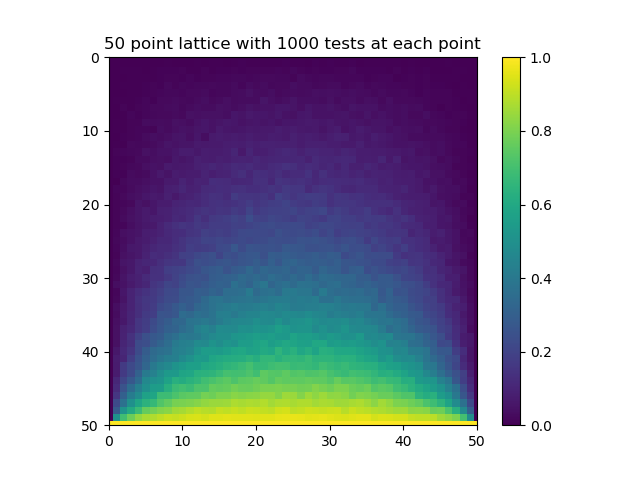

### Note:

$1$ I created a function that could run the test for a large lattice with a lower number of tests at each point, but run that test multiple times. This was statistically identical to just raising the number of trials of each point, and was very similar to my implementation in question 2, so I ommited it. Furthermore, this process already uses all the cores available, any more could create too many process that get in each others way.

$2$ I have intensionally not included a cutoff due to not wanting to add in artificial errors.

# Question 2: Potentials generated by random particles.

We  consider  the  unit  circle  in  two  dimensions  with  radius  1  centered  at  the origin.  We now place a numberNof potential unit charges at random positionsyjinside the unit circle.  Each potential generates the field

$\displaystyle u_j(x) =\frac{1}{2π} ln|x−y_j|$ for $x \neq y_j$

Hence, the total field at a given point $x$ outside the unit circle ascomputed as

$\displaystyle u(x) =\frac{1}{2π}\sum ln|x−y_j|.$  

We are interested in the function

$\displaystyle f(r) = \frac{1}{2πr} \frac{1}{N} \int_{C_r} u(s)ds $

which is the average value of the combined potentialuover a circle with radiusr.  To approximate the value $f(r)$ we can use a trapezoid rule to obtain

$\displaystyle f(r) \approx \frac{1}{NM}\sum_{j=0}^{M−1} u(x\tau)$

with the $x\tau$ being $M$ points equally spaced in angle on the circle with radius $r$.Implement an efficient method to compute and visualize $f(r)$ for $1 < r <10$. 

A  single  particle  at  the  center  of  the  unit  circle  produces  the  potential

$u_0(r) =\frac{1}{2π} lnr $ for $r >0$ 

uniform in each direction.By  performing  trials  with  random  placements  for  the  positionsyjin  theunit  circle  estimate  the  expected  value

$e(r)  = E [\frac{|f(r)−u_0(r)|}{u_0(r)}]$

for  the  relativedifference of $u_0(r)$ and $f$ for $1< r <10$.  Again, carefully describe your codeimplementation strategy, optimisations, and the influence of the parametersN,Mand the number of random trials

# Start Problem:

To begin with we should generate some random points for $-1< x <1$. We can do this a few ways. Firstly just by doing a random ammount of points between x and y:

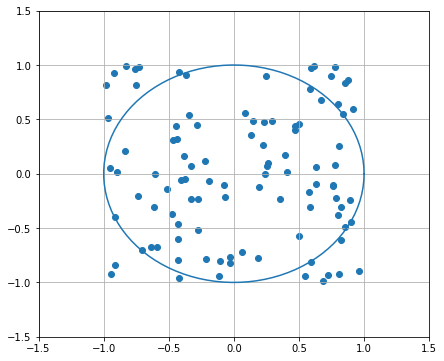

In [33]:
import numpy as np 
import pylab as plt 

#make the random points
points = (np.random.randint(-100000,100000,(2,100))/100000)

#make a circle to show where the points need to be in
theta = np.linspace(0, 2*np.pi, 100)
a = 1 * np.cos(theta) 
b = 1 * np.sin(theta)

#plot it all
plt.figure(figsize=(7,6))
plt.scatter(points[0][:],points[1][:])
plt.plot(a,b)
plt.ylim(-1.5,1.5)
plt.xlim(-1.5,1.5)
plt.grid()

Clearly this implementation is not correct (and took me far too long to realise it). These have the problem of not being in the range of a circle. To correct this we will generate a set of points along a random distance r. They will then be converted into x and y coordinates by $cos$ and $sin$ functions. 

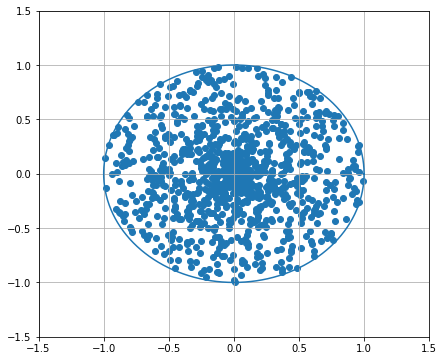

In [66]:
points = 1000
theta = np.linspace(0, 2*np.pi, 1000)
a = 1 * np.cos(theta) 
b = 1 * np.sin(theta)

# this time we use the r value to create random points
r = (np.random.rand((points)))
x = r * np.cos(theta),
y = r * np.sin(theta)

plt.figure(figsize=(7,6))
plt.plot(a, b,)
plt.scatter(x, y)
plt.ylim(-1.5,1.5)
plt.xlim(-1.5,1.5)
plt.grid()

However the data points are clumped in the middle, to solve this we simply take the square root of our radius before assining a $cos$ and $sin$ components:

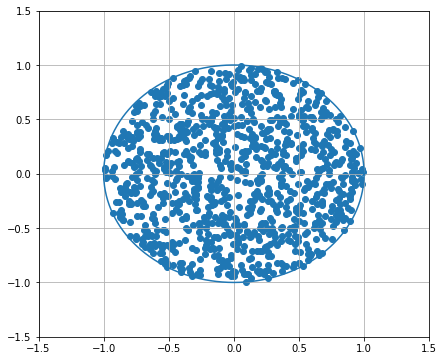

In [37]:
points = 1000
theta = np.linspace(0, 2*np.pi, 1000)
a = 1 * np.cos(theta) 
b = 1 * np.sin(theta)

# this time we square root the value
r = np.sqrt(np.random.rand((points)))
x = r * np.cos(theta)
y = r * np.sin(theta)

plt.figure(figsize=(7,6))
plt.plot(a, b,)
plt.scatter(x, y)
plt.ylim(-1.5,1.5)
plt.xlim(-1.5,1.5)
plt.grid()

This works because before it was assumed that; 

$\displaystyle r= x+y$ 

but it clearly does not, it obeys; 

$\displaystyle r^2= x^2 + y^2$

To solve this we simply root the $r$.

With a way to generate points we can now move on to creating a circle at a set radius $R$ to test at evenly spaced intervals $M$. We start with setting a radius of 5 and creating a cirlce at that point. we then set up evenly spaced points around this cirlce. To beging with we have 100 points

In [67]:
M=100                        

RM=4                                   # RM= radius of M
cM=RM*2*np.pi                           #circumference of M
pointsM=np.linspace(0,cM,M)            #equal points along M
xM =RM * np.cos(pointsM)
yM =RM * np.sin(pointsM)

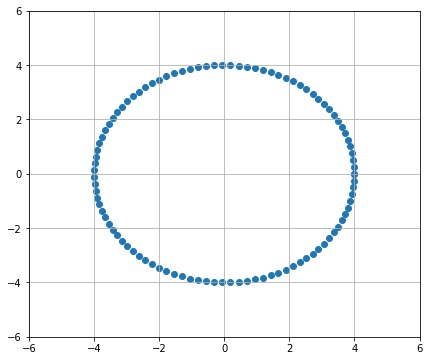

In [70]:
plt.figure(figsize=(7,6))
plt.scatter(xM,yM)
plt.ylim(-6,6)
plt.xlim(-6,6)
plt.grid()

Now that we have a point to test from we can subtract each of our data points from each of the points in this circle. To do this we create 2 for loops. One to run over all the data points $N$ and one to run over all the test points $M$;

In [71]:
import numpy as np

#for now we have 10 points

M=10                        
N=10

theta = np.linspace(0, 2*np.pi, N)
r = np.sqrt(np.random.rand((N)))  
x = r * np.cos(theta)
y = r * np.sin(theta)

RM=4                                   # RM= radius of M
normr=[]                        
cM=RM*2*np.pi                   #circumference of M
pointsM=np.linspace(0,cM,M)     #equal points along M
xM =RM * np.cos(pointsM)
yM =RM * np.sin(pointsM)

for k in range(M):

    for i in range(N): 

        #for each point around radius RM a point k is taken against all the charges of i
        part1=xM[k]-x[i]         
        part2=yM[k]-y[i]
        norm=np.sqrt(part1**2+part2**2)
        normr.append(norm)
        

Here the function runs over $M$ points in a circle and that minuses $N$ points from each charge within our initial circle.

Appending the data is used here for simplicity, but will be removed later to keep njit happy. 

Now we want to test at multiple radii, to do this we must iterate over the all the points from 1 to 10, we use a for loop for this.

At this point I will post my full function and talk about the optimisations I have made. The variables in our function are:

$\displaystyle N=$ the number of points in our unit circle

$\displaystyle M=$ the number of points to test around each radius from $ 1 < r < 10$

$\displaystyle sizer=$ the number values of $R$ we wish to test 

There are also the three important equations added:

$e(r)  = E [\frac{|f(r)−u_0(r)|}{u_0(r)}]$

$\displaystyle f(r) \approx \frac{1}{NM}\sum_{j=0}^{M−1} u(x\tau)$

$u_0(r) =\frac{1}{2π} lnr $ for $r >0$ 

I implemented the test fully without recording much of the inbetween process. So a lot appears in a short space of time here. However all that is really happening is that the below equations are being calucated, then appended to initialed matrices, $totaler$ and $totalf$. These need to be appened in order to be able to plot the functions later. 

We will generate a set of points to keep the timing tests fair

In [82]:
theta = np.linspace(0, 2*np.pi, 100)
r = np.sqrt(np.random.rand((100))) 
x = r * np.cos(theta)
y = r * np.sin(theta) 

### Note that all functions that compare speed will use the above points for their tests to show that they output the same values.

In [84]:
import numpy as np
from numba import prange
from numpy import linalg as LA
import numexpr as ne

def potential(N,M,sizer):

    Rruns=np.linspace(1,10,sizer+1)                # Rruns= no of runs at set radius
    
    #set up matricies for appendage later
    totaler = []  
    totalf = []
    
    for j in prange(sizer):
        RM=Rruns[j+1]                                    # RM= radius of M
        normr=[]                       # have to clear normr each time we iterate
        u0=(1/(2*np.pi))*np.log(RM)    # charge at center of circle of radius M
        
        cM=RM*2*np.pi              #circumference of M
        pointsM=np.linspace(0,cM,M)     #equal points along M
        xM =RM * np.cos(pointsM)
        yM =RM * np.sin(pointsM)
        
        
        for k in prange(M):
            for i in prange(N): 
                
                part1=xM[k]-x[i]
                part2=yM[k]-y[i]
                
                norming=np.sqrt((part1*part1)+(part2*part2))
                normr.append(norming)
      
        #set up our various functions we want to test
        ut=((1)/(2*np.pi))*np.log(normr) 
        f=(1/(N*M))*np.sum(ut) 
        er = np.sqrt((f-u0)**2)/u0
        
        #append the matricies set up earlier, note they need to appended as we need a plot out after
        totalf.append(f)    
        totaler.append(er)
                   
    return totaler, totalf, Rruns

The first optimisation to be noted, is that LA.norm is actually slower than squaring and rooting to get an absolute value. To demonstrate here is the same function but with LA.norm inserted instead of the roots: 

In [85]:
import numpy as np
from numba import prange
from numpy import linalg as LA
import numexpr as ne

def potentialLAnorm(N,M,sizer):

    Rruns=np.linspace(1,10,sizer+1)                # Rruns= no of runs at set radius
    totaler = []  
    totalf = []
    
    for j in prange(sizer):
        RM=Rruns[j+1]                                    # RM= radius of M
        normr=[]                       # have to clear normr each time we iterate
        u0=(1/(2*np.pi))*np.log(RM)    # charge at center of circle of radius M
        
        cM=RM*2*np.pi              #circumference of M
        pointsM=np.linspace(0,cM,M)     #equal points along M
        xM =RM * np.cos(pointsM)
        yM =RM * np.sin(pointsM)
        
        
        for k in prange(M):
            for i in prange(N): 
                
                part1=xM[k]-x[i]
                part2=yM[k]-y[i]
                
                #these bits have changed
                xminusy=[[part1],[part2]]
                norming=LA.norm(xminusy)
                normr.append(norming)
      
        ut=((1)/(2*np.pi))*np.log(normr) 
        f=(1/(N*M))*np.sum(ut) 
        
        #and this line
        er=(LA.norm(f-u0)/(u0)) 
        totalf.append(f)    
        totaler.append(er)
                   
    return totaler, totalf, Rruns

In [86]:
with Timer() as t:
    totaler,totalf,Rruns=potential(100,50,1000)
print(t.interval)

8.893197059631348


In [87]:
with Timer() as t:
    totalerLAnorm,totalfLAnorm,RrunsLAnorm=potentialLAnorm(100,50,1000)
print(t.interval)

32.23273277282715


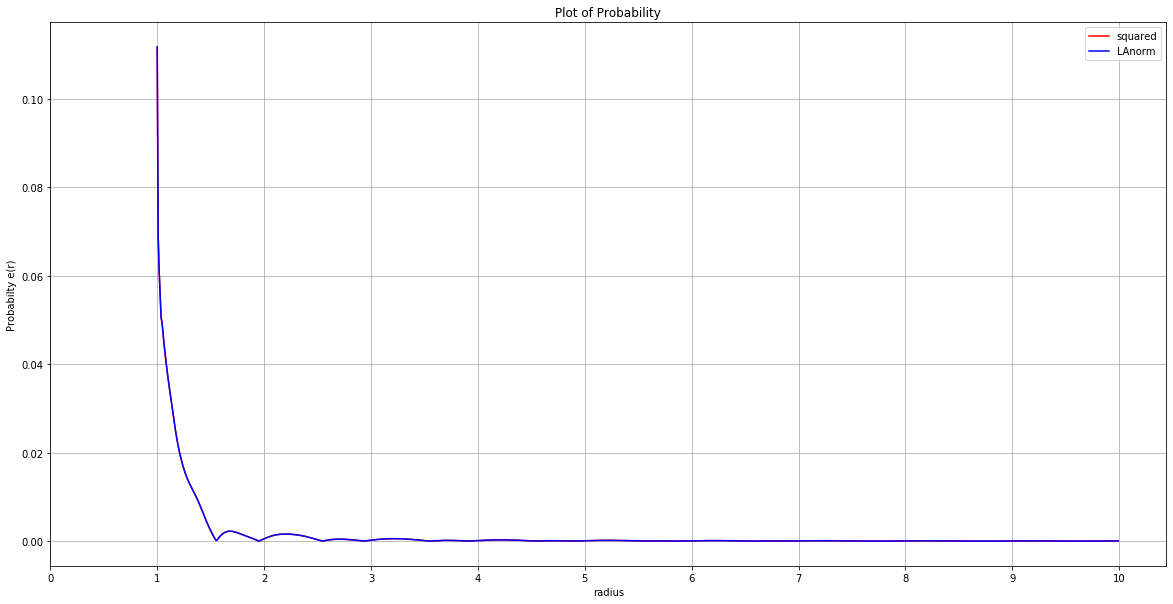

In [88]:
plt.figure(figsize=(20,10))
plt.plot(Rruns[:-1],totaler,color='r',label='squared')
plt.plot(RrunsLAnorm[:-1],totalerLAnorm,color='b',label='LAnorm')
#plt.yscale("log")
plt.ylabel('Probabilty e(r)')
plt.xlabel('radius')
plt.xticks(np.linspace(0,10,11))
plt.title('Plot of Probability')
plt.legend(loc='upper right')
plt.grid()
plt.show()

It can be a little hard to see but both of the graphs are underneath each other. Above is the plot of $E(r)$ and below $F(r)$:

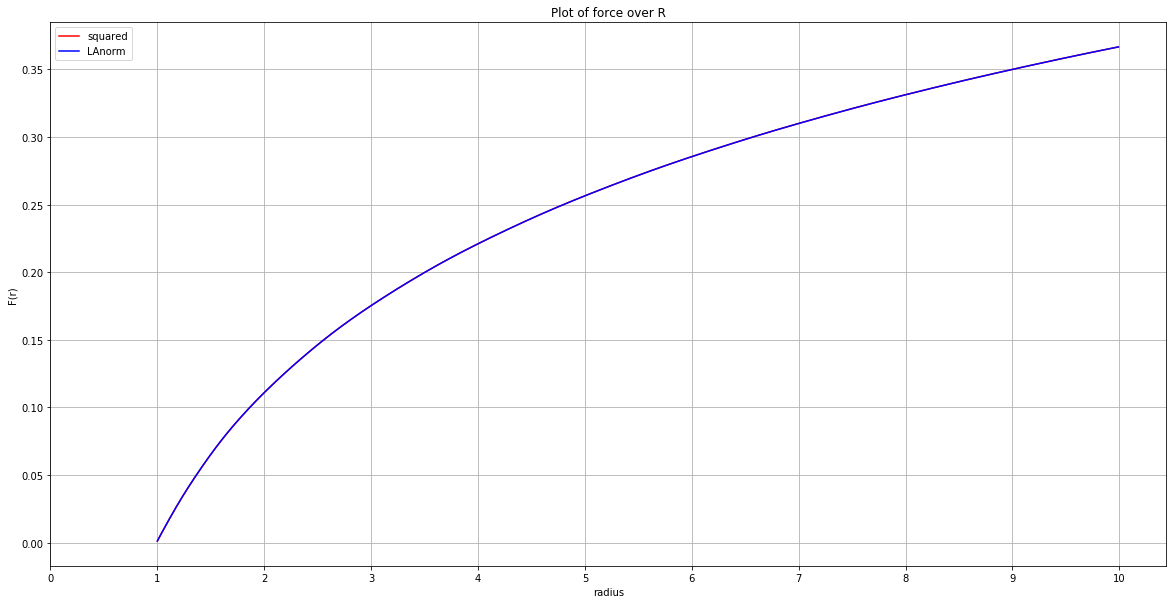

In [89]:
plt.figure(figsize=(20,10))
plt.plot(Rruns[:-1],totalf,color='r',label='squared')
plt.plot(RrunsLAnorm[:-1],totalfLAnorm,color='b',label='LAnorm')
#plt.yscale("log")
plt.ylabel('F(r)')
plt.xlabel('radius')
plt.xticks(np.linspace(0,10,11))
plt.title('Plot of force over R')
plt.legend(loc='upper left')
plt.grid()
plt.show()

As both procduce Identicle results, I will select the faster one without LA.norm in it. I will talk more about $F(r)$ later on at the end. 

Next we will find an ideal value for M, and show how the function changes as we change its parameters. After a certain point we hit diminishing returns on how large we make $M$, atleast in a circle of radius 10. To demonstrate it we can use $u_0 - f(r)$ to show what an ideal charge would be vs our calculated $F(r)$.

However in order to do this we will need to extract some more information from our code, speficially a seperate value $totalfmu$:

In [90]:
import numpy as np
from numba import njit, prange
import matplotlib.pyplot as plt
from numpy import linalg as LA
from multiprocessing import Pool
import multiprocessing
import numexpr as ne

def potentialwithM(N,M,sizer):

    Rruns=np.linspace(1,10,sizer+1)                # Rruns= no of runs at set radius
    totaler = []  
    totalf = []
    
    #added new matrix for output
    totalfmu=[]
   
    for j in prange(sizer):
        RM=Rruns[j+1]                                    # RM= radius of M
        normr=[]
        u0=(1/(2*np.pi))*np.log(RM)    # charge at center of circle of radius M
 
        cM=RM*2*np.pi              #circumference of M
        pointsM=np.linspace(0,cM,M)     #equal points along M
        xM =RM * np.cos(pointsM)
        yM =RM * np.sin(pointsM)
        
        
        for k in prange(M):
            for i in prange(N): 
                
                part1=xM[k]-x[i]
                part2=yM[k]-y[i]            
                norming=np.sqrt((part1*part1)+(part2*part2))
                normr.append(norming)
      
        ut=((1)/(2*np.pi))*np.log(normr) 
        f=(1/(N*M))*np.sum(ut) 
        er = np.sqrt((f-u0)**2)/u0
        
        #this will give us the difference
        fmu=f-u0
        totalfmu.append(fmu)
        
        totalf.append(f)    
        totaler.append(er)
                   
    return totaler, totalf, Rruns,totalfmu

In [91]:
totaler10,totalf10,Rruns10,totalfmu10=potentialwithM(100,10,1000)
totaler25,totalf25,Rruns25,totalfmu25=potentialwithM(100,25,1000)
totaler50,totalf50,Rruns50,totalfmu50=potentialwithM(100,50,1000)
totaler100,totalf100,Rruns100,totalfmu100=potentialwithM(100,100,1000)

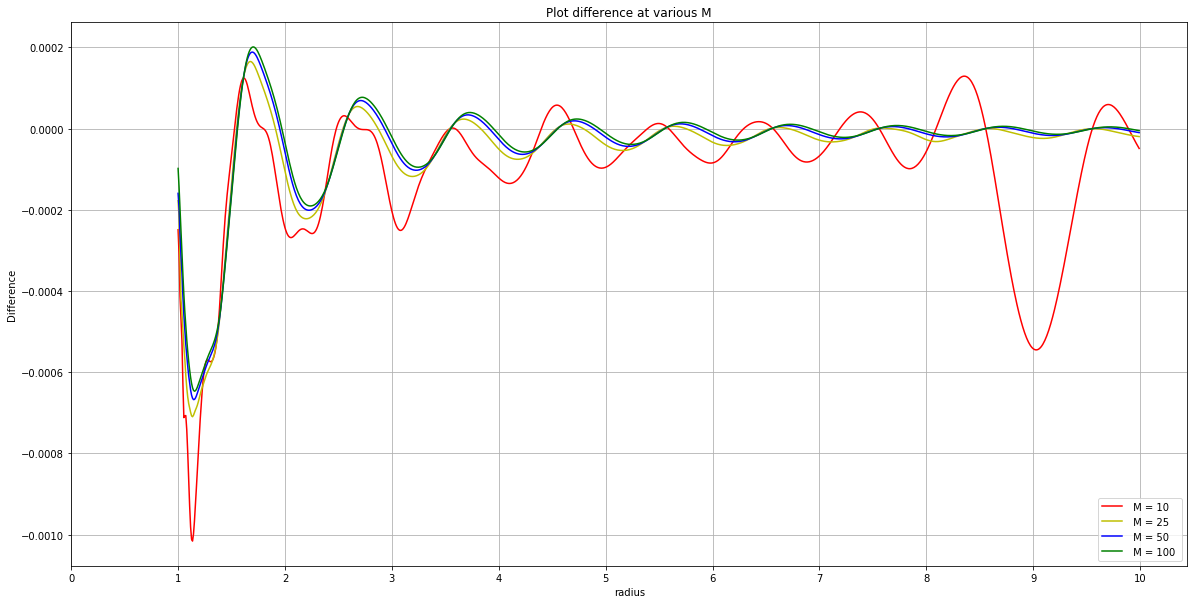

In [114]:
plt.figure(figsize=(20,10))
plt.plot(Rruns10[:-1],totalfmu10,color='r',label=' M = 10 ')
plt.plot(Rruns25[:-1],totalfmu25,color='y',label=' M = 25 ')
plt.plot(Rruns50[:-1],totalfmu50,color='b',label=' M = 50 ')
plt.plot(Rruns100[:-1],totalfmu100,color='g',label=' M = 100 ')
#plt.yscale("log")
plt.ylabel('Difference')
plt.xlabel('radius')
plt.xticks(np.linspace(0,10,11))
plt.title('Plot difference at various M')
plt.legend(loc='lower right')
plt.grid()
plt.show()

From this we can see that after the difference between 50 and 100 points is much smaller than the difference between 10 and 25. Thus it can be assumed that we get diminishing returns when increasing M, 50 is a good baseline even at $r \rightarrow 10$

As such we will keep M at 50 as a good baseline when optimising code, but can increase it for our final results.



### Note:

A quick note here, numexpr did not work with Njit at all, and infact made previous runs slower, and as such while I have code that uses it, I didnt include it. 


### Njit:

For the next optimisation we use njit, and get increadible speed up in results. I have had to make a few optimisations to allow for njit to work. np.sum didnt seem to want to work even though it should work with njit in its documentation. I think it was due to combining lists into a sum, although again it seemed like that should work. 

I got around this by changing an append of $normr$ to an addition, and letting the $F(r)$ formula normlise it like before. 

In [93]:
import numpy as np
from numba import njit, prange
import math


@njit(parallel=True)
def potentialnjit(N,M,sizer):
       
    pi=3.14159265359 #sometimes np.pi didnt want to play ball
    Rruns=np.linspace(1,10,sizer+1)                
    totaler = []  
    totalf = []

    for j in range(sizer):
        RM=Rruns[j+1]                                    
        normr=0
        u0=(1/(2*pi))*np.log(RM)    
        cM=RM*2*pi              
        pointsM=np.linspace(0,cM,M)     
        xM =RM * np.cos(pointsM)
        yM =RM * np.sin(pointsM)
             
        for k in range(M):
           
            #now a prange
            for i in prange(N): 
                
                part1=xM[k]-x[i]
                part2=yM[k]-y[i]
                norm=np.sqrt((part1*part1)+(part2*part2))
                log=np.log(norm)
                
                #this bit changed
                normr += log
        
        #this now no longer needs the summation, as it happens in the for loop.
        ut=normr/(2*pi)
        f=(1/(N*M))*(ut)
        er = np.sqrt((f-u0)**2)/u0
        totalf.append(f)    
        totaler.append(er)
                   
    return totaler, totalf,Rruns

In [94]:
with Timer() as t:
    totalernjit,totalfnjit,Rrunsnjit=potentialnjit(100,50,1000)
print(t.interval)

2.4928786754608154


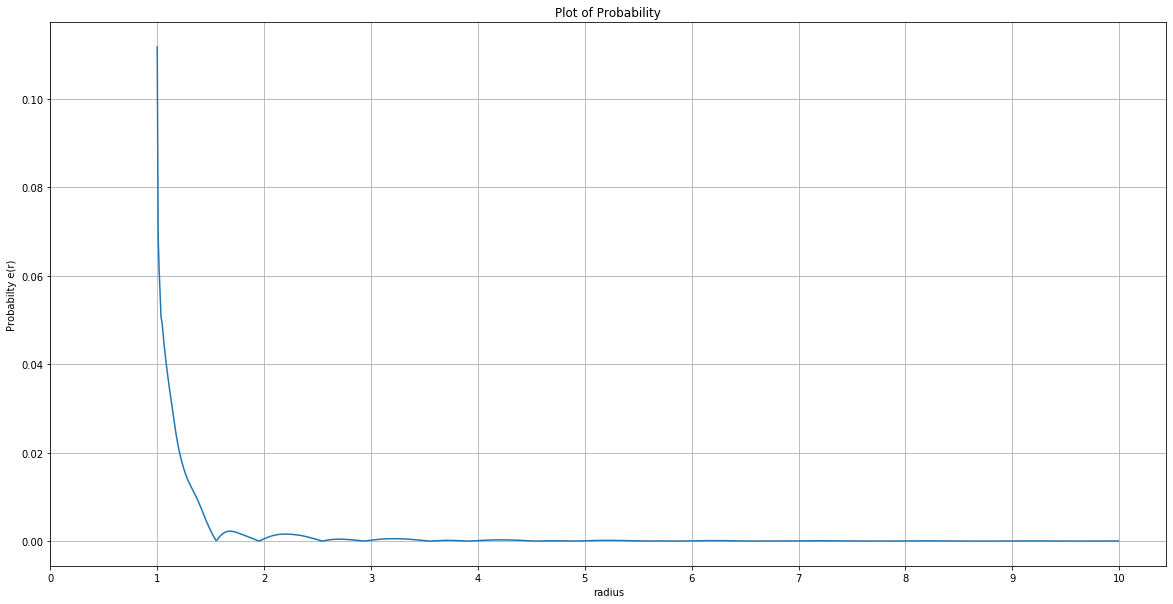

In [110]:
plt.figure(figsize=(20,10))
plt.plot(Rrunsnjit[:-1],totalernjit)
#plt.yscale("log")
plt.ylabel('Probabilty e(r)')
plt.xlabel('radius')
plt.xticks(np.linspace(0,10,11))
plt.title('Plot of Probability')
plt.grid()
plt.show()

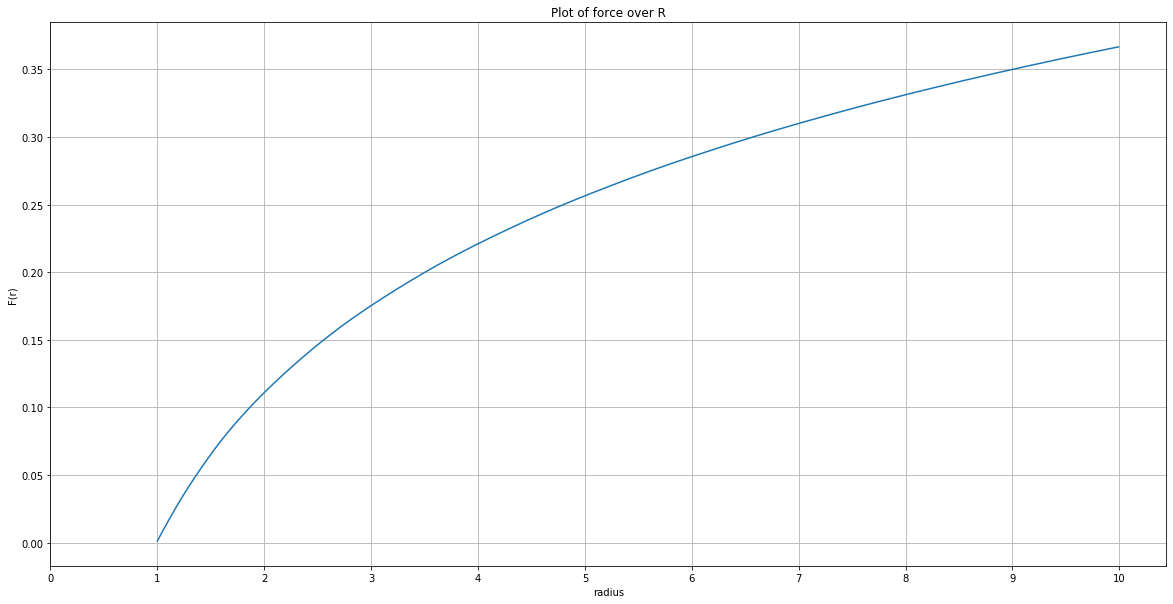

In [111]:
plt.figure(figsize=(20,10))
plt.plot(Rrunsnjit[:-1],totalfnjit)
#plt.yscale("log")
plt.ylabel('F(r)')
plt.xlabel('radius')
plt.xticks(np.linspace(0,10,11))
plt.title('Plot of force over R')
plt.grid()
plt.show()

Note how the graphs are the same as with our previous examples, but with a huge speed increase. The function excellently uses all the cores in cpy without needing any multiprocessing. 

This is technically where the question ends, with an $E(r)$ and an $F(r)$ plotted.

But, with this increased speed it becomes highly viable to run multiple runs of this with different data points and take an average for a function. To do this we simply reinsert the point generation into the formula. Then we create a final function which we can call for a set number of runs:

In [97]:
import numpy as np
from numba import njit, prange
import math


@njit(parallel=True)
def potentialnjitfinal(N,M,sizer):
       
    pi=3.14159265359 #sometimes np.pi didnt want to play ball
    Rruns=np.linspace(1,10,sizer+1)                # Rruns= no of runs at set radius
    totaler = []  
    totalf = []
    
    
    theta = np.linspace(0, 2*pi, N)
    r = np.sqrt(np.random.rand((N)))  # to get them more evenly spread out
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    
    
    for j in range(sizer):
        RM=Rruns[j+1]                                    # RM= radius of M
        normr=0
        u0=(1/(2*pi))*np.log(RM)    # charge at center of circle of radius M
        cM=RM*2*pi              #circumference of M
        pointsM=np.linspace(0,cM,M)     #equal points along M
        xM =RM * np.cos(pointsM)
        yM =RM * np.sin(pointsM)
             
        for k in range(M):
           
            for i in prange(N): 
                
                part1=xM[k]-x[i]
                part2=yM[k]-y[i]
                norm=np.sqrt((part1*part1)+(part2*part2))
                log=np.log(norm)
                normr += log
        
        ut=normr/(2*pi)
        f=(1/(N*M))*(ut)
        er = np.sqrt((f-u0)**2)/u0
        totalf.append(f)    
        totaler.append(er)
                   
    return totaler, totalf,Rruns

With this completed we set up a function to call it and to keep the results of each run in new results matrices. 

It can then average the results over a number of runs, all while using many cores. 

In [99]:
import numpy as np

def multipotential(N,M,sizer,noruns):
    
    #initialise the matricies to be used
    multier=np.zeros(sizer)
    multif=np.zeros(sizer)
    
    for i in range(noruns):
        # really running out of names here
        erappend,fappend,Rruns= potentialnjitfinal(N,M,sizer)
        multier += erappend
        multif += fappend
        
    #simple average assuming each run has equal weighting   
    return multier/noruns, multif/noruns,Rruns

with how fast our code is we can set this up to be quite large with many runs. to start with we will do 10 runs

In [100]:
with Timer() as t:
    multier,multif,multiRruns=multipotential(100,50,1000,10)
print(t.interval)

11.634496927261353


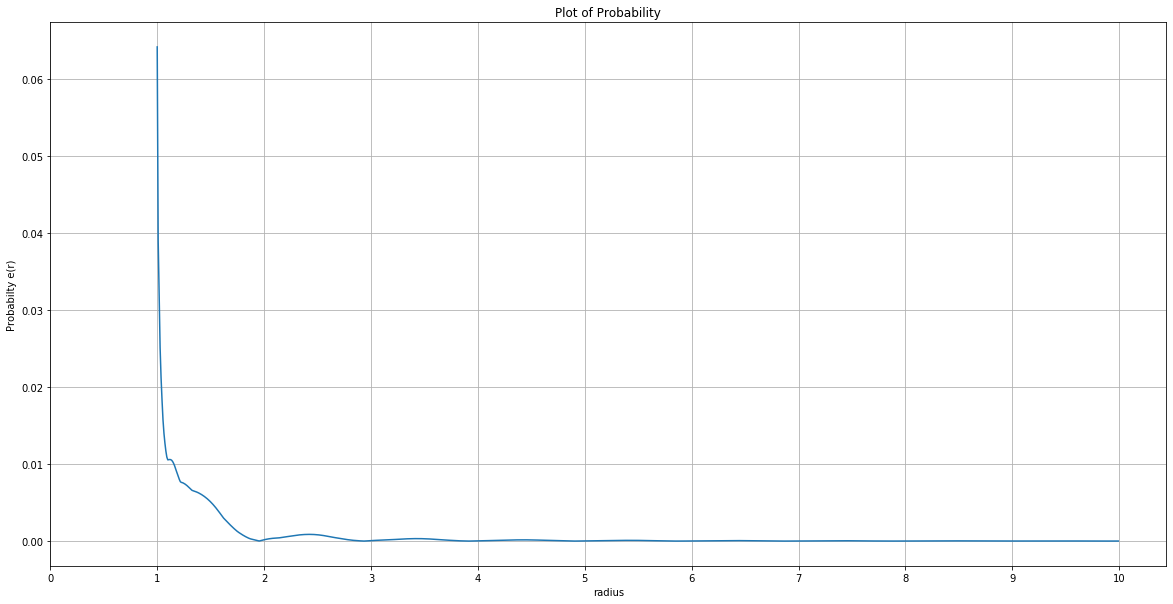

In [106]:
plt.figure(figsize=(20,10))
plt.plot(multiRruns[:-1],multier)
#plt.yscale("log")
plt.ylabel('Probabilty e(r)')
plt.xlabel('radius')
plt.xticks(np.linspace(0,10,11))
plt.title('Plot of Probability')
plt.grid()
plt.show()

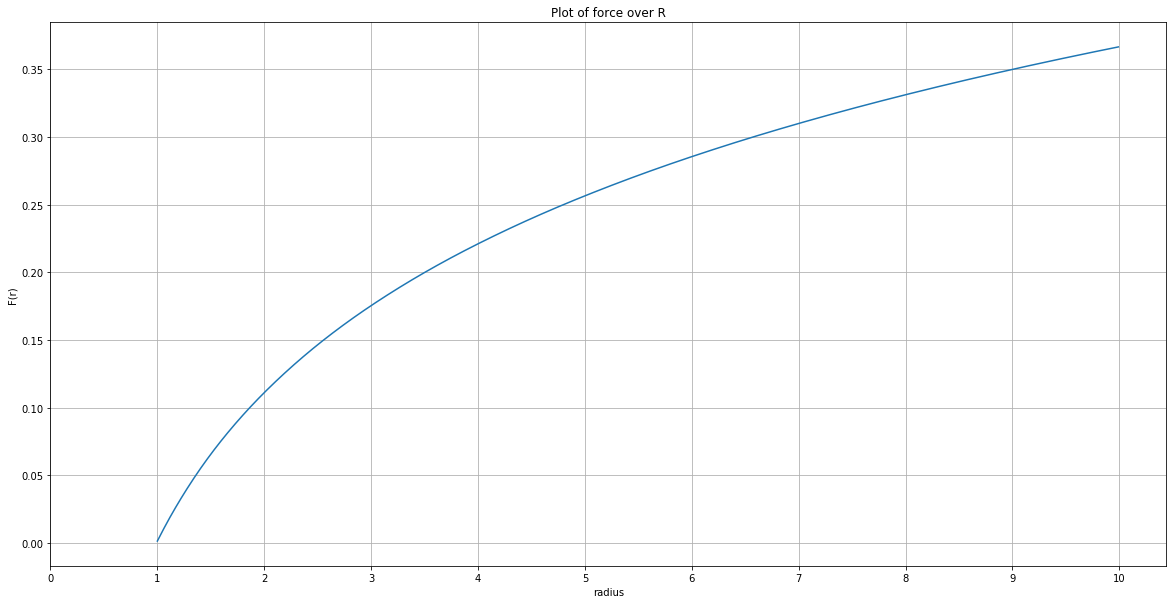

In [109]:
plt.figure(figsize=(20,10))
plt.plot(multiRruns[:-1],multif)
#plt.yscale("log")
plt.ylabel('F(r)')
plt.xlabel('radius')
plt.xticks(np.linspace(0,10,11))
plt.title('Plot of force over R')
plt.grid()
plt.show()

This concludes our final plot. I will not run the code to high levels here but instead add a print out like I did with the last question, but rest assured its the same code, with just much higher values to run from:

$\displaystyle N=500$ 

$\displaystyle M=100$ 

$\displaystyle sizer=1000$ 

$\displaystyle noruns=100$ 

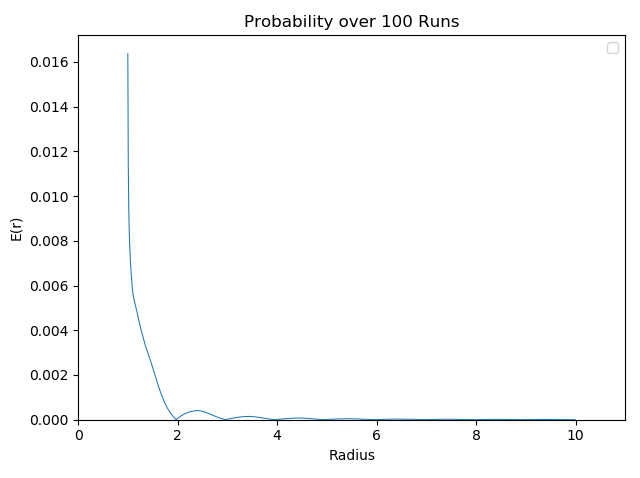

We can see that it looks to be nicely averaged, but its alittle hard to see the values towards the end of the graph.

If we compare this to the logarithmic graph, we can see how even the distribution really is. If this were to be compared to one of the earlier graphs (by enabling the ylog scale) we can see that it is very even. I will run a second simulation to show it though;

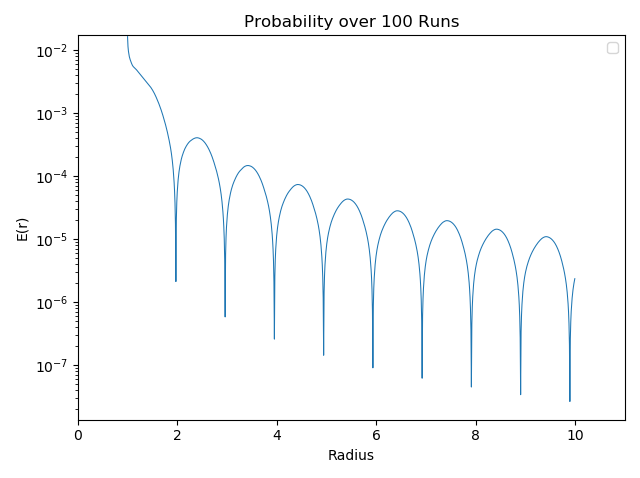

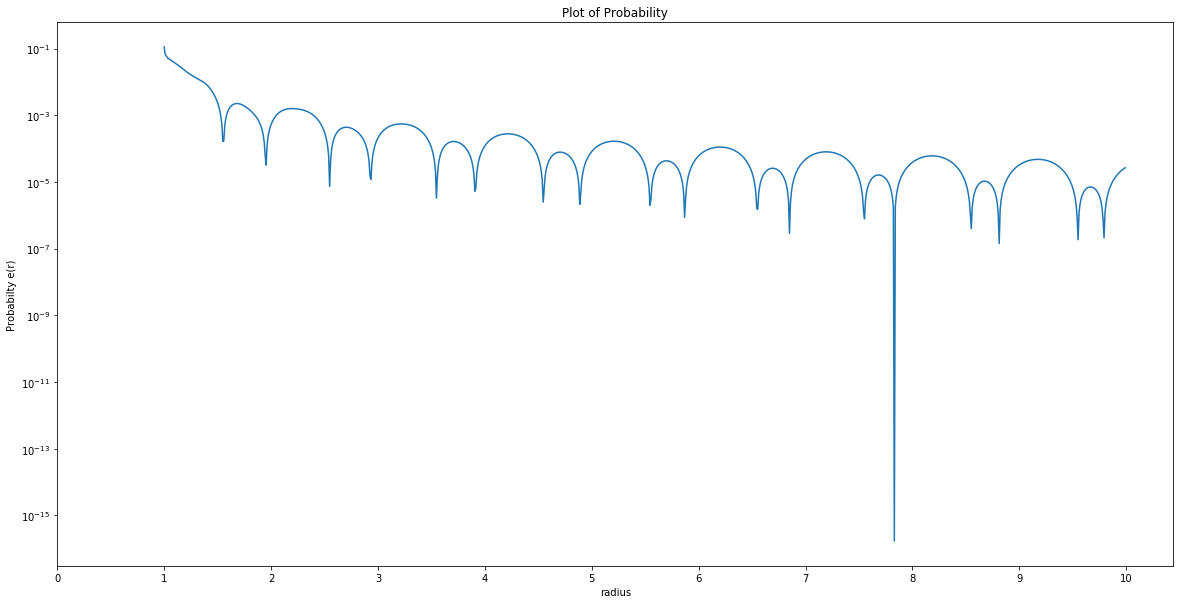

In [103]:
#from totalernjit,totalfnjit,Rrunsnjit=potentialnjit(100,50,1000)
plt.figure(figsize=(20,10))
plt.plot(Rrunsnjit[:-1],totalernjit)
plt.yscale("log")
plt.ylabel('Probabilty e(r)')
plt.xlabel('radius')
plt.xticks(np.linspace(0,10,11))
plt.title('Plot of Probability')
plt.show()

This seems to be prevelant for most of my runs, but its good to know that averaging over different point distributions removes it.

F(r)seems to be a fairly constant plot no matter what we do, its only for very small N M and sizer that we would see any difference. 

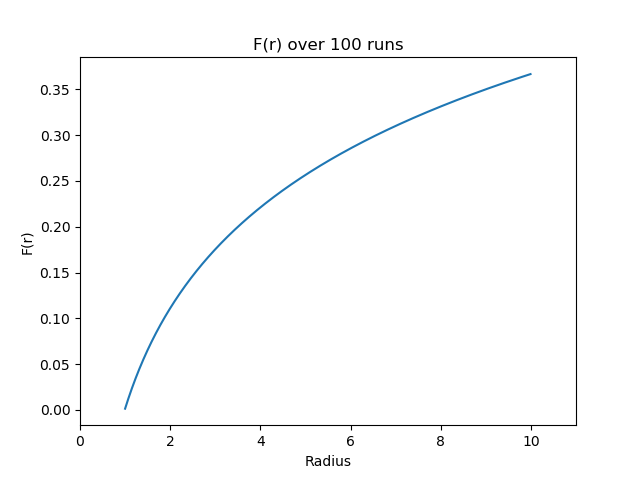

This will now be demonstrated below:

In [104]:
totalernjitsmall2,totalfnjitsmall2,Rrunsnjitsmall2=potentialnjit(2,2,1000)
totalernjitsmall5,totalfnjitsmall5,Rrunsnjitsmall5=potentialnjit(5,5,1000)
totalernjitsmall10,totalfnjitsmall10,Rrunsnjitsmall10=potentialnjit(10,10,1000)
totalernjitsmall20,totalfnjitsmall20,Rrunsnjitsmall20=potentialnjit(20,20,1000)

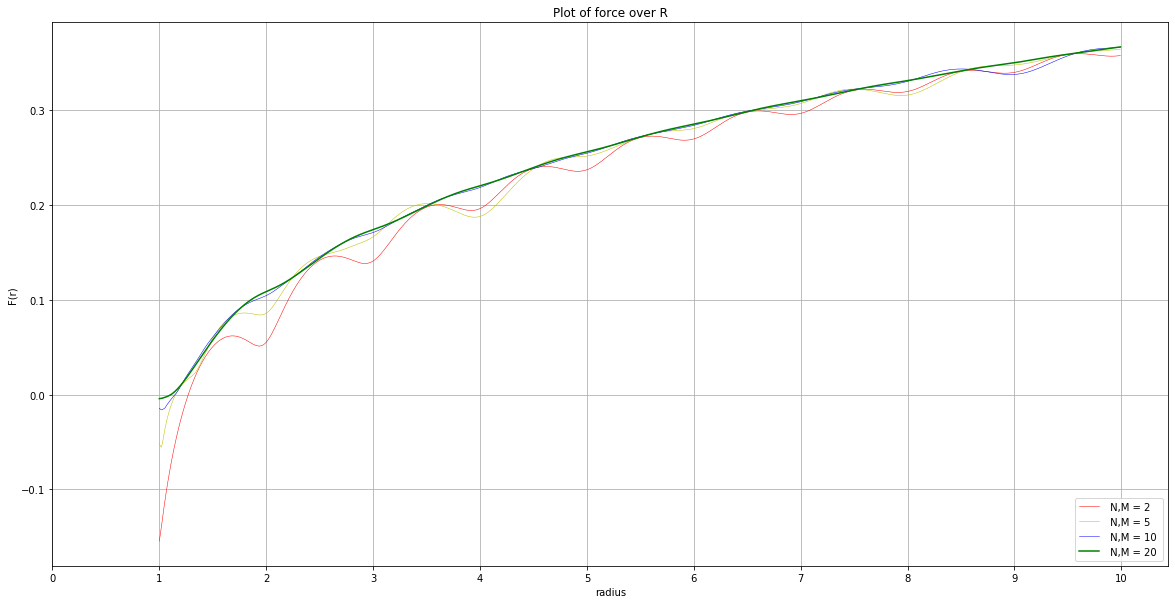

In [118]:
plt.figure(figsize=(20,10))
plt.plot(Rrunsnjitsmall2[:-1],totalfnjitsmall2,color='r',label=' N,M = 2 ',linewidth=0.5)
plt.plot(Rrunsnjitsmall2[:-1],totalfnjitsmall5,color='y',label=' N,M = 5 ',linewidth=0.5)
plt.plot(Rrunsnjitsmall2[:-1],totalfnjitsmall10,color='b',label=' N,M = 10 ',linewidth=0.5)
plt.plot(Rrunsnjitsmall2[:-1],totalfnjitsmall20,color='g',label=' N,M = 20 ')
plt.ylabel('F(r)')
plt.xlabel('radius')
plt.xticks(np.linspace(0,10,11))
plt.title('Plot of force over R')
plt.legend(loc='lower right')
plt.grid()
plt.show()

We can see that even by low $N$ and $M$ the line is fairly smooth by the end, and for our initial trials of $N=100$ and $M=50$ the line is almost a perfect logarithm. 

Lastly, the other graph got a log graph and I didnt want it to be lonely, it was saved and calculated though, so here it is:

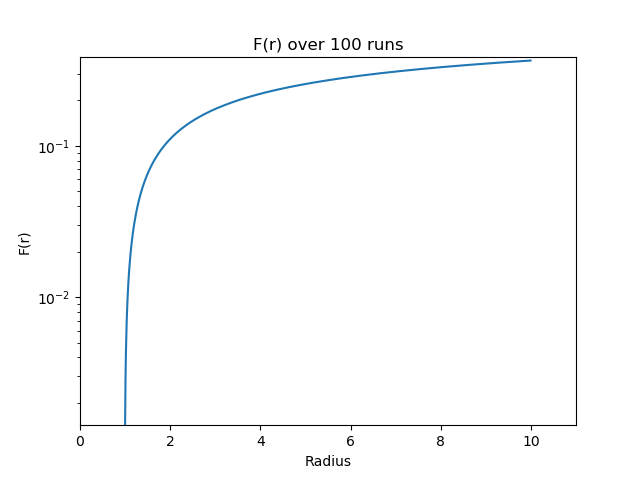